In [1]:
#--------fundamental modules-----
import os
import pandas as pd
import tqdm as tqdm
from scipy import stats
import numpy as np
import string

#-------visulizaiton modules-----

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot,plot,init_notebook_mode
init_notebook_mode(connected= True)

import squarify
import geopandas as gpd

import country_converter as coco

from wordcloud import WordCloud, STOPWORDS


#______warningfilter module____________
import warnings
warnings.filterwarnings('ignore')


## setting pandas dataframe settings

pd.set_option('max_rows', 25)
pd.set_option('max_columns', 100)
pd.set_option('max_colwidth',2500)
plt.rcParams['figure.dpi'] = 150

### positioning all the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
             display: table-cell;
             text-align: center;
             vertical-align: middle;
}
""")

In [2]:
#pip install --upgrade matplotlib 

In [3]:
#!pip install missingno

In [4]:
#!pip install country_converter --upgrade

In [5]:
#!pip install squarify

In [6]:
#!pip install geopandas

In [7]:
#!pip install wordcloud

In [8]:
#pip install --upgrade pandas

In [9]:
# นำเข้าข้อมูล
#df = pd.read_csv("netflix_titles.csv")
#df = pd.read_csv("netflix_titles_IMDB_1st_utf.csv")
# df = pd.read_csv("netflix_all_IMDB_2nd.csv")
df = pd.read_csv("netflix_all_IMDB_final.csv")

In [10]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              9391 non-null   object
 1   title             9391 non-null   object
 2   starring          8386 non-null   object
 3   country           8382 non-null   object
 4   date_added        9381 non-null   object
 5   release_year      9391 non-null   int64 
 6   rating            9387 non-null   object
 7   duration          9388 non-null   object
 8   listed_in         9391 non-null   object
 9   imdb              9391 non-null   object
 10  netflix_original  9391 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 807.2+ KB


In [11]:
df.describe(include = [np.object]).T.style.set_properties(**{'background-color':'white',
                                     'color': 'black',
                                      'border-color':'black' })

,count,unique,top,freq
type,9391,2,Movie,6715
title,9391,8883,22-Jul,3
starring,8386,7742,David Attenborough,19
country,8382,764,United States,3094
date_added,9381,1776,"January 1, 2020",110
rating,9387,18,TV-MA,3207
duration,9388,222,1 Season,1793
listed_in,9391,629,"Dramas, International Movies",362
imdb,9391,78,Not Found,1373


In [12]:
df.describe(include = [np.number]).T.style.set_properties(**{'background-color':'white',
                                     'color': 'black',
                                      'border-color':'black'})

,count,mean,std,min,25%,50%,75%,max
release_year,9391.000000,2014.475988,8.625385,1925.000000,2014.000000,2017.000000,2019.000000,2021.000000
netflix_original,9391.000000,0.062187,0.241508,0.000000,0.000000,0.000000,0.000000,1.000000


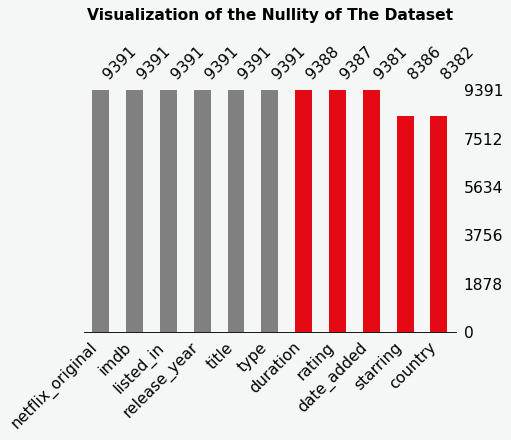

In [13]:
fig, ax = plt.subplots(dpi = 80)
ax.set_facecolor('#f5f6f6')
fig.patch.set_facecolor('#f5f6f6')

color = ['grey','grey','grey','grey','grey','grey','#E50914','#E50914','#E50914','#E50914','#E50914']
msno.bar(df,fontsize =14, color = color, sort = 'descending', ax = ax, figsize = (12,6))
#labels = ['Description','Listed','Duration', 'Release Year', 'Title', 'Type','Show Id','Rating', 'Date Added','Country', 'Cast','Director']
# ax.title.set_text('Visualization of the Nullity of The Dataset\n')
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)
plt.title('Visualization of the Nullity of The Dataset\n', {'size':14, 'weight':'bold'})
fig.show()

In [14]:
df_orig = df.copy() # copying original dataset 

# handling missing values
# df['director'] = df['director'].fillna('NoDataAvailable')
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['starring'] = df['starring'].fillna('NoDataAvailable')
df['country'] = df['country'].fillna(df['country'].mode()[0])

print('count of values')
print(df.isna().sum())

count of values
type                0
title               0
starring            0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
imdb                0
netflix_original    0
dtype: int64


Text(0.5, 1.0, 'How Content is Distributed? - Movie vs TV')

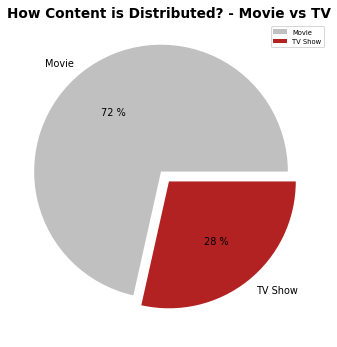

In [15]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})
explode = [0.1, 0]
## plot
# trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
# layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
# fig = go.Figure(data = [trace], layout = layout)
# iplot(fig)
# grouped['count']
# grouped
plt.figure(figsize=(12,6), dpi=70)
plt.pie(grouped['count'], explode = explode, labels=grouped['type'], colors=['silver', 'firebrick'], autopct ='%1.0f %%')
plt.legend(loc = "upper right", fontsize='x-small')
plt.title("How Content is Distributed? - Movie vs TV", {'size':14, 'weight':'bold'})

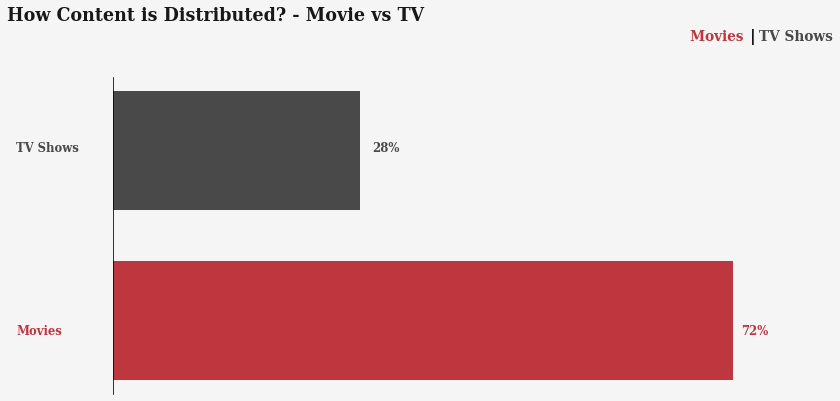

In [16]:
x = df['type'].value_counts()

# plot
fig, ax = plt.subplots(figsize = (12,6), dpi=70)
ax.barh([1], x.values[1], height = 0.7, color = 'black', alpha = 0.7)
plt.text(-1050,1, 'TV Shows', {'font': 'Serif', 'size':'12', 'color':'black', 'weight':'bold'}, alpha = 0.7)
plt.text(2800,1, '28%', {'font': 'Serif', 'size':'12', 'color':'black', 'weight':'bold'}, alpha = 0.7)


ax.barh([0], x.values[0], height = 0.7, color = '#b20710', alpha = 0.8)
plt.text(-1050,-0.08, 'Movies',{'font': 'Serif','weight':'bold','size': '12','style':'normal', 'color':'#b20710'}, alpha = 0.8)
plt.text(6800,-0.08, '72%',{'font':'Serif','weight':'bold' ,'size':'12','color':'#b20710'}, alpha = 0.8)


fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

plt.text(-1150,1.77, 'How Content is Distributed? - Movie vs TV' ,{'font': 'Serif', 'size': '18','weight':'bold', 'color':'black'}, alpha = 0.9)
plt.text(6250,1.65, 'Movies ', {'font': 'Serif','weight':'bold','size': '14', 'color':'#b20710'}, alpha = 0.8)
plt.text(6900,1.65, '|', {'color':'black' , 'size':'16', 'weight': 'bold'}, alpha = 0.9)
plt.text(7000,1.65, 'TV Shows', {'font': 'Serif','weight':'bold', 'size': '14','color':'black'}, alpha = 0.7)
#plt.text(-1150,1.5, 'Looks like netflix mostly produce Movies over TV shows, maybe \nthis is due to most people likly ot spend limited amount \nof time rather bench watching.', 
#        {'font':'Serif', 'size':'12.5','color': 'black'})


ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [17]:
# converting the pandas dataframe to datatime format
df['date_added'] = pd.to_datetime(df['date_added'])
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month
df['added_month_name'] = df['date_added'].dt.month_name()


# creating a series of time data

add_year = df['added_year'].value_counts()
release = df['release_year'].value_counts()

# creating a dataframe

add_df = pd.DataFrame({'year': add_year.index, 'added_year': add_year.values})
release_df = pd.DataFrame({'year': release.index, 'release_year': release.values})

year_df = pd.merge(add_df, release_df, how = 'right', on = 'year')
year_df.fillna('0', inplace = True)
year_df['added_year'] = year_df.added_year.astype('int')

year_df = year_df.sort_values('year', ascending = False).reset_index(drop = True)

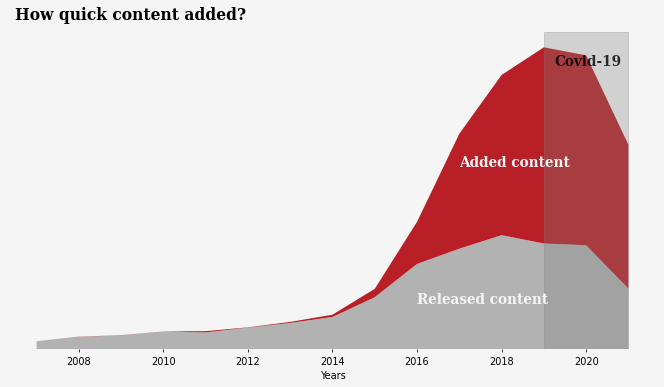

In [18]:
## visulaization

fig, ax = plt.subplots(figsize = (12,6), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

labels = [ 'Released content', 'Added content ']

# stackplot
# ax.stackplot(year_df.year[0:15], year_df.release_year[0:15],year_df.added_year[0:15],labels =labels, 
#               colors = ['#221f1f','#b20710',], baseline = 'zero', alpha = 0.9 )
ax.stackplot(year_df.year[0:15], year_df.release_year[0:15],year_df.added_year[0:15],labels =labels, 
              colors = ['#ABABAB','#b20710',], baseline = 'zero', alpha = 0.9 )

# Region of interest
 
ax.axvspan(2019,2021, color = 'grey',alpha = 0.3)
ax.text(2019.25, 3100, 'Covid-19', {'font':'serif', 'size': '14', 'color': 'black', 'weight':'bold'},alpha = 0.8)

# legend
ax.text(2017, 2000, '{}'.format(labels[1]), {'font':'serif', 'size':'14', 'color':'#f6f5f5', 'weight':'bold'})
ax.text(2016, 500, '{}'.format(labels[0]),{'font':'serif', 'size':'14', 'color':'#f6f5f5','weight':'bold'}) 

#title
 
# ax.text(2006.5, 3600, 'Visualization of Yearwise Leadtimes - How quick content added?\n', 
#                       {'font':'serif', 'size':'14', 'weight': 'bold','color': 'black'})
ax.text(2006.5, 3600, 'How quick content added?', 
                      {'font':'serif', 'size':'16', 'weight': 'bold','color': 'black'})
# ax.text(2006.5, 3390, 'Looks like as internet is booming gap between content official \nrelease time and available time to platform is drastically reduced. ',
#                       {'font':'serif', 'size':'12','color': 'black'})

plt.box(on = None)

ax.axes.get_yaxis().set_visible(False)
plt.xlabel("Years")
fig.show()

Text(0.5, 1.0, 'Movie ratings\n')

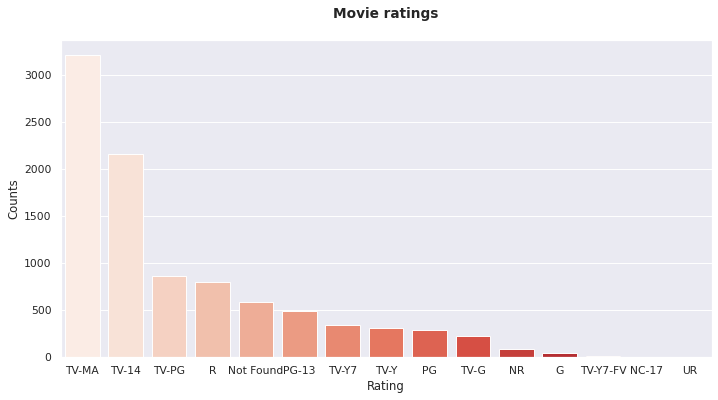

In [19]:
plt.figure(figsize=(12,6), dpi=70)
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="Reds", order=df['rating'].value_counts().index[0:15])
plt.ylabel("Counts")
plt.xlabel("Rating")
plt.title("Movie ratings\n", {'size':14, 'weight':'bold'})

In [20]:
movie_df = df[df['type'] == 'Movie']
show_df = df[df['type'] == 'TV Show']
temp_duration = movie_df['duration'].apply(lambda x: int(x.split(' ')[0]))

In [21]:
movie_df.loc[temp_duration.loc[temp_duration < 90].index, 'duration_bin'] = 'Less than 1.30 hours'
movie_df.loc[temp_duration.loc[(temp_duration >= 90) & (temp_duration < 150)].index, 'duration_bin'] = 'More than 1.30 - less than 2.30 hours'
movie_df.loc[temp_duration.loc[temp_duration >= 150].index, 'duration_bin'] = 'More than 2.30 hours'

In [22]:
movie_df.head()

,type,title,starring,country,date_added,release_year,rating,duration,listed_in,imdb,netflix_original,added_year,added_month,added_month_name,duration_bin
2,Movie,Je Suis Karl,"Luna Wedler, Jannis Niew‚àö‚àÇhner, Milan Peschel, Edin Hasanovi∆í√°, Anna Fialov‚àö¬∞, Marlon Boess, Victor Boccard, Fleur Geffrier, Aziz Dyab, M‚àö¬©lanie Fouch‚àö¬©, Elizaveta Maximov‚àö¬∞","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",5.4,0,2021,9,September,More than 1.30 - less than 2.30 hours
3,Movie,Europe's Most Dangerous Man: Otto Skorzeny in Spain,NoDataAvailable,United States,2021-09-22,2020,TV-MA,67 min,"Documentaries, International Movies",6.8,0,2021,9,September,Less than 1.30 hours
5,Movie,Jeans,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi, Nassar",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",6.4,0,2021,9,September,More than 2.30 hours
6,Movie,Dark Skies,"Keri Russell, Josh Hamilton, J.K. Simmons, Dakota Goyo, Kadan Rockett, L.J. Benet, Rich Hutchman, Myndy Crist, Annie Thurman, Jake Brennan",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",6.3,0,2021,9,September,More than 1.30 - less than 2.30 hours
8,Movie,The Stronghold,"Gilles Lellouche, Karim Leklou, Fran‚àö√üois Civil, Ad‚àö¬Æle Exarchopoulos, Kenza Fortas, Cyril Lecomte, Micha‚àö¬¥l Abiteboul, Idir Azougli, Vincent Darmuzey, Jean-Yves Berteloot",United States,2021-09-17,2021,TV-MA,105 min,"Action & Adventure, Dramas, International Movies",Not Found,0,2021,9,September,More than 1.30 - less than 2.30 hours


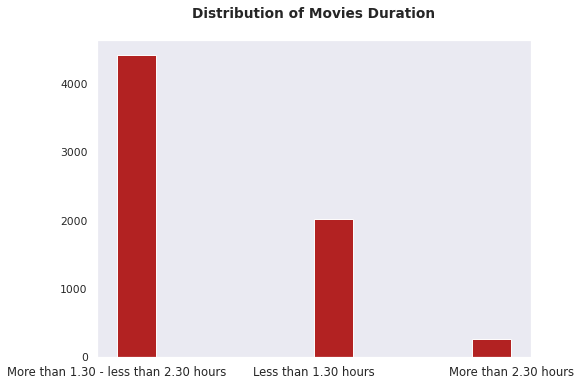

In [23]:
# fig = plt.hist(x=movie_df['duration_bin'], color=movie_df['duration_bin'])
plt.figure(figsize=(8,6), dpi=70)
plt.hist(x=movie_df['duration_bin'], color='firebrick')
plt.xticks(fontsize=12)
plt.grid(False)
plt.title("Distribution of Movies Duration\n", {'size':14, 'weight':'bold'})
plt.show()

In [24]:
df_nflx = df[df['netflix_original'] == 1]

In [25]:
df_nflx

,type,title,starring,country,date_added,release_year,rating,duration,listed_in,imdb,netflix_original,added_year,added_month,added_month_name
3464,Movie,The Misadventures of Hedi and Cokeman,NoDataAvailable,United States,2021-02-10,2021,Not Found,99 min,Comedy,4.5,1,2021,2,February
3465,Movie,Sol Levante,NoDataAvailable,United States,2020-04-02,2020,Not Found,4 min,Anime / Short,4.7,1,2020,4,April
3466,Movie,The Larva Island Movie,NoDataAvailable,United States,2020-07-23,2020,Not Found,90 min,Animation,5.1,1,2020,7,July
3467,Movie,Rim of the World,NoDataAvailable,United States,2019-05-24,2019,Not Found,98 min,Science fiction adventure,5.2,1,2019,5,May
3468,Movie,"Strip Down, Rise Up",NoDataAvailable,United States,2021-02-05,2021,Not Found,112 min,Documentary,5.2,1,2021,2,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9386,Movie,"What Happened, Miss Simone?",NoDataAvailable,United States,2015-06-26,2015,Not Found,84 min,Documentary,7.6,1,2015,6,June
9387,Movie,Road to Roma,Yalitza Aparicio Od‚àö‚â†n Ayala Eugenio Caballero,Mexico,2020-02-11,2020,Not Found,72 min,Making-of,7.7,1,2020,2,February
9388,Movie,The Trial of the Chicago 7,Yahya Abdul-Mateen II Sacha Baron Cohen Daniel Flaherty Joseph Gordon-Levitt Michael Keaton Frank Langella John Carroll Lynch Eddie Redmayne Noah Robbins Mark Rylance Alex Sharp Jeremy Strong,United States,2020-10-16,2020,Not Found,130 min,Drama,7.8,1,2020,10,October
9389,Movie,The Ivory Game,NoDataAvailable,United States,2016-11-04,2016,Not Found,112 min,Documentary,7.9,1,2016,11,November


Text(0.5, 1.0, 'IMDb Scores From Netflix Original Content\n')

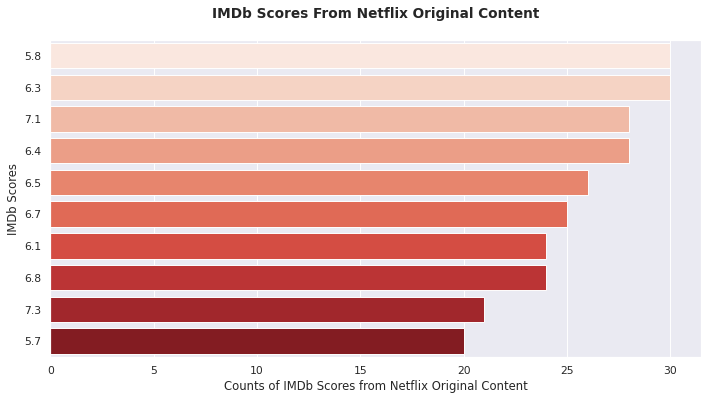

In [26]:
plt.figure(figsize=(12,6), dpi=70)
sns.set(style="darkgrid")
ax = sns.countplot(y="imdb", data=df_nflx, palette="Reds", order=df_nflx['imdb'].value_counts().index[0:10])
plt.xlabel("Counts of IMDb Scores from Netflix Original Content")
plt.ylabel("IMDb Scores")
plt.title("IMDb Scores From Netflix Original Content\n", {'size':14, 'weight':'bold'})

Text(0.5, 1.0, 'Contents Produces from Netflix Original by Country\n')

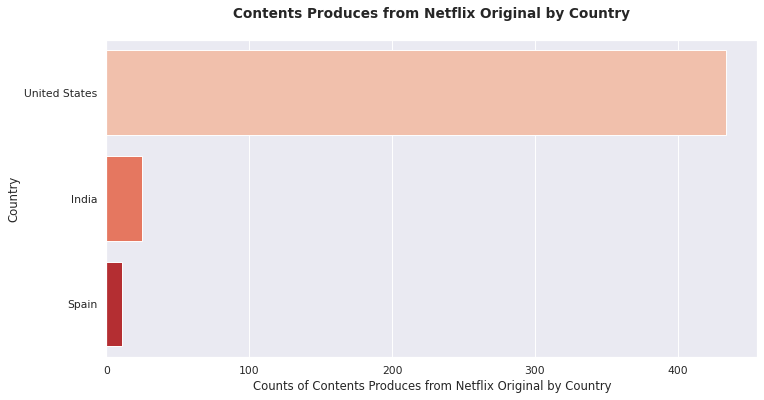

In [27]:
plt.figure(figsize=(12,6), dpi=70)
sns.set(style="darkgrid")
ax = sns.countplot(y="country", data=df_nflx, palette="Reds", order=df_nflx['country'].value_counts().index[0:3])
plt.xlabel("Counts of Contents Produces from Netflix Original by Country")
plt.ylabel("Country")
plt.title("Contents Produces from Netflix Original by Country\n", {'size':14, 'weight':'bold'})

In [28]:
df_nflx.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 3464 to 9390
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   type              584 non-null    object        
 1   title             584 non-null    object        
 2   starring          584 non-null    object        
 3   country           584 non-null    object        
 4   date_added        584 non-null    datetime64[ns]
 5   release_year      584 non-null    int64         
 6   rating            584 non-null    object        
 7   duration          584 non-null    object        
 8   listed_in         584 non-null    object        
 9   imdb              584 non-null    object        
 10  netflix_original  584 non-null    int64         
 11  added_year        584 non-null    int64         
 12  added_month       584 non-null    int64         
 13  added_month_name  584 non-null    object        
dtypes: datetime64[ns](1), 

In [29]:
# col = "country"
# grouped_country = df_nflx[col].value_counts().reset_index()
# grouped_country = grouped_country.rename(columns = {col : "count", "index" : col})
# explode_1 = [98, 0]

# plt.pie(grouped_country['count'], explode=explode_1, labels=grouped_country['country'], colors=['silver', 'firebrick'], autopct ='%1.0f %%')
# plt.legend(loc = "upper right", fontsize='x-small')

Text(0.5, 1.0, 'Contents Added By Year - Netflix Original Contents\n')

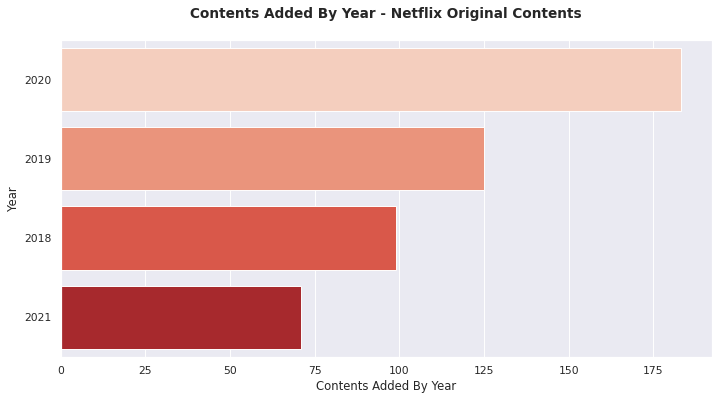

In [30]:
plt.figure(figsize=(12,6), dpi=70)
sns.set(style="darkgrid")
ax = sns.countplot(y="added_year", data=df_nflx, palette="Reds", order=df_nflx['added_year'].value_counts().index[0:4])
plt.xlabel("Contents Added By Year")
plt.ylabel("Year")
plt.title("Contents Added By Year - Netflix Original Contents\n", {'size':14, 'weight':'bold'})

In [31]:
netflix_th = df[df['country']=='Thailand']
nannef = netflix_th.dropna()
# import plotly.express as px
# fig = px.treemap(nannef, path=['country','director'],
#                   color='director', hover_data=['director','title'],color_continuous_scale='Purples')
# fig.show()

In [32]:
nannef

,type,title,starring,country,date_added,release_year,rating,duration,listed_in,imdb,netflix_original,added_year,added_month,added_month_name
135,Movie,Deep,"Panisara Rikulsurakan, Kay Lertsittichai, Supanaree Sutavijitvong, Krit Jeerapattananuwong, Warisara Jitpreedasakul, Dujdao Vadhanapakorn, Kim Waddoup, Philaiwan Khamphirathat, Wongsakorn Rassamitat, Bhumibhat Thavornsiri",Thailand,2021-07-16,2021,TV-MA,101 min,"Dramas, International Movies, Thrillers",4.8,0,2021,7,July
190,TV Show,Bangkok Love Stories: Innocence,"Nida Patcharaveerapong, Nicole Theriault, Nattapol Diloknawarit, Tosatid Darnkhuntod, Narupornkamol Chaisang, Pavadee Komchokpaisan, Kawin Manonukul, Ponlawit Ketprapakorn, Rudklao Amratisha, Paramej Noiam, Tachakorn Boonlupyanun, Teera Pratumtree, Nawarat Techarathanaprasert, Naphon Phromsuwan",Thailand,2021-06-19,2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV Dramas",6.6,0,2021,6,June
195,TV Show,The Judgement,"Lapassalal Jiravechsoontornkul, Nontanun Anchuleepradit, Thanabordee Jaiyen, Pamiga Sooksawee, Pongsathon Laiwrakoran, Nara Thepnupa, Premanan Sripanich, Tanutchai Wijitvongtong, Wasu Sansingkeaw, Arpasiri Nitipon",Thailand,2021-06-19,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",7.5,0,2021,6,June
292,TV Show,The Underclass,"Nannaphas Loetnamchoetsakun, Praewa Suthamphong, Sumitra Duangkaew, Tanutchai Wijitvongtong, Tarisa Preechatangkit, Natticha Chantaravareelekha, Miori Ohkubo, Pakwan Noijaiboon, Napaphat Worraphuttanon, Vathusiri Phuwapunyasiri, Rinrada Inthaisong, Suchaya Saenkhot, Mananya Kaoju, Kandis Wanarun, Ekapol Deebunmee, Panta Pattanaampaiwong, Rachaya Tupkunanon, Supasawad Buranawech, Thitirat Rojsangrat, Sawanee Utoomma, Phattharanarin Mueanarit, Chanyapuk Numprasop",Thailand,2021-04-14,2020,TV-MA,1 Season,"International TV Shows, TV Dramas, Teen TV Shows",6.4,0,2021,4,April
610,TV Show,Girl from Nowhere,"Chicha Amatayakul, Thanawetch Siriwattanakul, Pajaree Nantarat, Thitinan Khlangphet, Chonnikan Netjui, Nutthasit Kotimanuswanich, Tatchapol Thitiapichai, Chanicha Boonpanuvichit, Morakot Liu, Ekawat Niratvorapanya, Anuchit Sapanpong, Awat Ratanapintha, Claudia Chakrapan, Piyathida Woramusik, Apasiri Kittithanon, Kunchanuj Kengkarnka, Nutnicha Lueanganankhun",Thailand,2021-07-06,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",7.6,0,2021,7,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8809,Movie,Shutter,"Ananda Everingham, Natthaweeranuch Thongmee, Achita Sikamana, Unnop Chanpaibool, Titikarn Tongprasearth, Sivagorn Muttamara, Chachchaya Chalemphol, Kachormsak Naruepatr",Thailand,2018-09-05,2004,TV-MA,96 min,"Horror Movies, International Movies",7,0,2018,9,September
8862,Movie,One Take,BNK48,Thailand,2020-06-18,2020,Not Found,85 min,Documentary,5.7,1,2020,6,June
8871,Movie,Suckseed,"Jirayu La-ongmanee, Pachara Chirathivat, Nattasha Nauljam, Thawat Pornrattanaprasert",Thailand,2018-09-05,2011,TV-MA,130 min,"Comedies, International Movies, Music & Musicals",7.4,0,2018,9,September
9085,TV Show,Ugly Duckling,"Mook Worranit Thawornwong, Puttichai Kasetsin, Natcha Juntapan, Neen Suwanamas, Esther Supreeleela, Shaun Jindachote, Lapassalal Jiravechsoontornkul, Chatchawit Techarukpong",Thailand,2019-02-15,2015,TV-14,4 Seasons,"International TV Shows, Romantic TV Shows, TV Dramas",7.6,0,2019,2,February
